# PCA Exploration

## Lit Review - hosseinadeli submission (Fred)

- 100 components - why? who knows

## Computing

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load data for subj1
data_lh = np.load('../../data/subj01/training_split/training_fmri/lh_training_fmri.npy')
data_rh = np.load('../../data/subj01/training_split/training_fmri/rh_training_fmri.npy')

In [4]:
print(f'LH shape: {data_lh.shape}\nRH Shape: {data_rh.shape}')

LH shape: (9841, 19004)
RH Shape: (9841, 20544)


In [5]:
#exploratory PCA for right hemisphere
pca = PCA(n_components=9841) # n_components must be between min(n_smaples, n_features), hence 9841
pca.fit(data_rh)  # X is your data

PCA(n_components=9841)

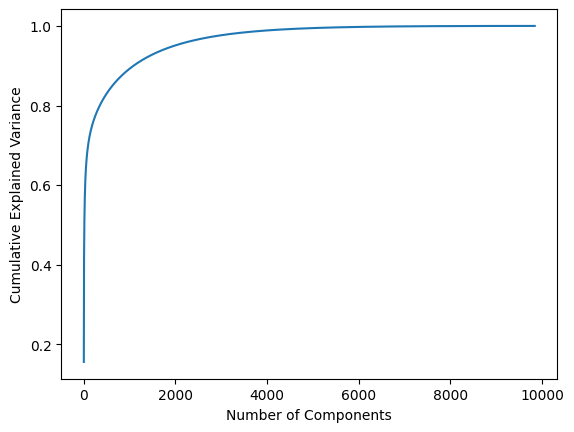

In [6]:
# plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

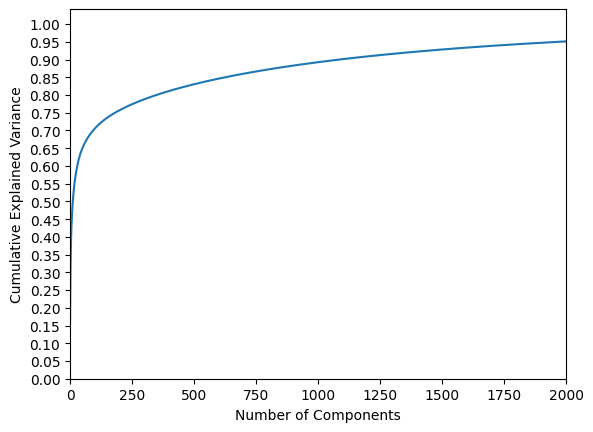

In [7]:
#same plot but zoomed in on num_components 0-2000
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.xlim(0, 2000)
plt.ylabel('Cumulative Explained Variance')
plt.yticks(np.arange(0, 1.05, 0.05))
plt.show()

In [15]:
#get the index of the first component with which me can explain 95% of variance
var = np.cumsum(pca.explained_variance_ratio_)
idx = np.where(var >= .95)[0]
idx[0]

1970